# Visualizing the Convolution Process

The following steps are ment to show the convolution process and its outputs to get a better understanding of how the process really looks like visually. For this we will use convolutional layers with randomly initialized weights. Additionally a 2d batch normalization step is added to demonstrate the difference between a normalized tensor and a raw one.

In [1]:
# Importing the Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Loading the training set
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [3]:
# Initializing 2 convolutional layers and a batch normalization layer
conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
bn = nn.BatchNorm2d(12)

In [4]:
# Getting an example image from the training set
IMAGE = train_set.data[0].reshape(1,1,28,28) 
IMAGE = IMAGE.type(torch.FloatTensor)
IMAGE.shape # (batch size, color channels, height, width)

torch.Size([1, 1, 28, 28])

In [5]:
# Performing 1st convolution on image
IMAGE = conv1(IMAGE)
IMAGE.shape

torch.Size([1, 6, 24, 24])

In [6]:
# Generating numpy array for display
CONV1_SHOW = IMAGE.detach().numpy()
CONV1_SHOW.shape

(1, 6, 24, 24)

#### First convolution visualization

The result of the first convolution is displayed below. It consists of 6 filters (feature maps) of 24 x 24. This is calculated using the following ecuation.
(W = input width, H = input height, Fw = Filter width, Fh = Filter height, P = Padding, S = Stride)

\begin{equation*}
\text {Output Width} = \frac{W - F_w + 2P}{S_w} + 1 \\
\text {Output Height} = \frac{H - F_h+ 2P}{S_w} + 1
\end{equation*}


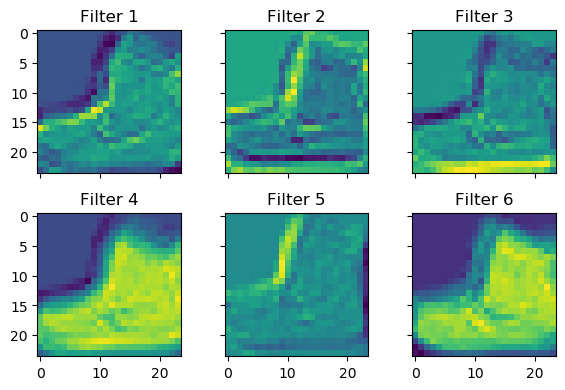

In [7]:
# Visualizing convolution outputs (filters)
fig, axs = plt.subplots(2, 3, dpi=100)
n = 0
for i in range(len(axs)):
    for j in range(len(axs[1])):
        axs[i,j].imshow(CONV1_SHOW[0,n])
        axs[i,j].set_title(f'Filter {n+1}')
        n += 1
        
for ax in fig.get_axes():
    ax.label_outer()

plt.tight_layout()

In [8]:
# Applying max pooling on filters
IMAGE = F.max_pool2d(IMAGE, kernel_size=2, stride=2)
IMAGE.shape

torch.Size([1, 6, 12, 12])

In [9]:
# Generating numpy array for display
MAX_POOL1_SHOW = IMAGE.detach().numpy()
MAX_POOL1_SHOW.shape

(1, 6, 12, 12)

#### Max pooling visualization

The following filters are the outputs of perfoming a Max pooling step on the convolution outputs, the size and width is
calculated using the same ecuation as the above step. 

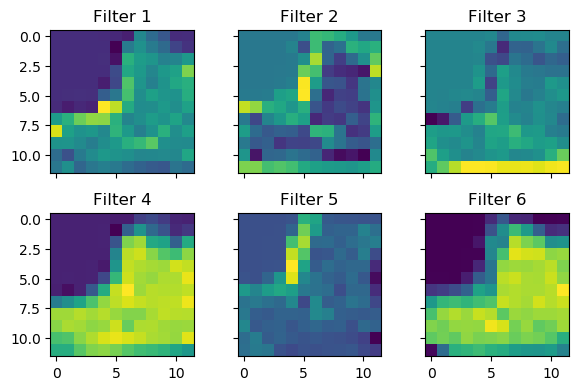

In [10]:
# Visualizing max pooling outputs
fig, axs = plt.subplots(2, 3, dpi=100)
n = 0
for i in range(len(axs)):
    for j in range(len(axs[1])):
        axs[i,j].imshow(MAX_POOL1_SHOW[0,n])
        axs[i,j].set_title(f'Filter {n+1}')
        n += 1


for ax in fig.get_axes():
    ax.label_outer()
    
plt.tight_layout()

In [11]:
# Performing 2nd convolution on the filters
IMAGE = conv2(IMAGE)
IMAGE.shape

torch.Size([1, 12, 8, 8])

In [12]:
# Generating numpy array for display
CONV2_SHOW = IMAGE.detach().numpy()
CONV2_SHOW.shape

(1, 12, 8, 8)

#### Second convolution visualization


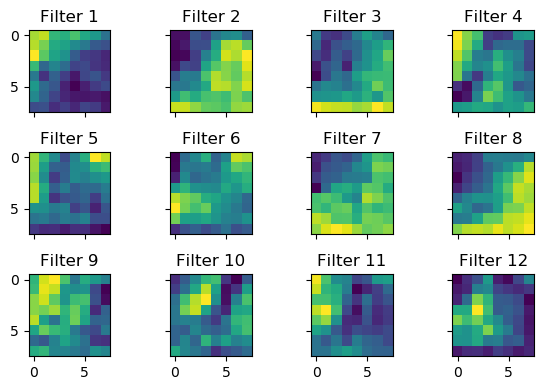

In [13]:
# Visualizing convolution outputs (filters)
fig, axs = plt.subplots(3, 4, dpi=100)
n = 0
for i in range(len(axs)):
    for j in range(len(axs[1])):
        axs[i,j].imshow(CONV2_SHOW[0,n])
        axs[i,j].set_title(f'Filter {n+1}')
        n += 1

for ax in fig.get_axes():
    ax.label_outer()

plt.tight_layout()

In [14]:
# Applying 2d batch normalization
IMAGE = bn(IMAGE)
IMAGE.shape

torch.Size([1, 12, 8, 8])

In [15]:
# Generating numpy array for display
BN_SHOW = IMAGE.detach().numpy()
BN_SHOW.shape

(1, 12, 8, 8)

#### Normalized array

In [16]:
BN_SHOW[0][1]

array([[-1.8062251 , -1.8142049 , -1.040887  , -1.300473  , -0.6504562 ,
        -0.38180202, -0.2854642 , -0.9106077 ],
       [-1.8889401 , -1.7162353 , -1.1564066 , -1.1402166 , -0.01164635,
         0.97184724,  1.0905021 ,  0.63592213],
       [-1.9514263 , -1.8972291 , -1.3238889 , -0.4661471 ,  0.1493702 ,
         1.1992178 ,  1.0178794 ,  1.4345537 ],
       [-1.8032293 , -1.2072312 , -1.2958736 ,  0.02583829,  0.54621595,
         0.8054708 ,  0.65188783,  1.2760513 ],
       [-1.0745724 , -0.5181077 , -0.5709053 ,  0.47264233,  1.0393047 ,
         0.82174116,  0.6215696 ,  1.05465   ],
       [-0.6151308 , -0.58922577, -0.3503184 ,  0.0863717 ,  1.0982662 ,
         1.052573  ,  0.78841275,  1.2359109 ],
       [-0.10090757,  0.39851838,  0.12938654,  0.4551652 ,  0.5001475 ,
         0.37877184,  0.77120507,  0.49537328],
       [ 1.147601  ,  1.1506557 ,  0.8709234 ,  0.6208636 ,  0.5767989 ,
         0.4678282 ,  0.8874918 ,  0.94082594]], dtype=float32)

#### Raw array

In [17]:
CONV2_SHOW[0][1]

array([[ -1.9414443,  -2.2132514,  24.127504 ,  15.285487 ,  37.426365 ,
         46.577267 ,  49.858727 ,  28.565083 ],
       [ -4.758888 ,   1.1237864,  20.192678 ,  20.744144 ,  59.185513 ,
         92.68528  ,  96.726906 ,  81.243    ],
       [ -6.8872848,  -5.041225 ,  14.487894 ,  43.704304 ,  64.67006  ,
        100.42998  ,  94.25323  , 108.44599  ],
       [ -1.8394068,  18.461493 ,  15.442152 ,  60.462315 ,  78.18742  ,
         87.018166 ,  81.78682  , 103.04708  ],
       [ 22.980112 ,  41.93442  ,  40.13603  ,  75.68136  ,  94.98302  ,
         87.572365 ,  80.75412  ,  95.50571  ],
       [ 38.62962  ,  39.511997 ,  47.649662 ,  62.524204 ,  96.99136  ,
         95.43496  ,  86.43713  , 101.67982  ],
       [ 56.145096 ,  73.15655  ,  63.989376 ,  75.08605  ,  76.61824  ,
         72.48394  ,  85.851006 ,  76.45562  ],
       [ 98.67181  ,  98.775856 ,  89.24761  ,  80.73007  ,  79.22914  ,
         75.51738  ,  89.811966 ,  91.62863  ]], dtype=float32)

### Density plots

Above we can se the comparison between a normalized array (tensor) and a raw one from the output of a convolutional layer. The normalized one has a less wider range of values than the raw one which is a huge improvement for the learning process, since all inputs to the next layer are within a small range of values the weights will be updated within a small range of values too.
Below we have the density plots for both arrays.

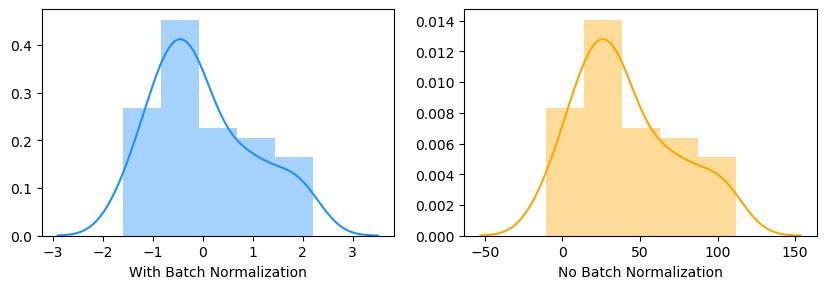

In [20]:
# Show density plots
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=False, dpi=100)
sns.distplot(BN_SHOW[0][1].reshape(-1) , color="dodgerblue", ax=axes[0], axlabel='With Batch Normalization')
sns.distplot(CONV2_SHOW[0][1].reshape(-1) , color="orange", ax=axes[1], axlabel='No Batch Normalization')